# Exploration of the HybridGaze dataset 

### Checking the dataset structure and it's contents

In [2]:
import h5py
import numpy as np
file_path = '../data/HybridGaze.h5'
with h5py.File(file_path, 'r') as f:
    # Print the keys at the root level
    print(f"Keys at root level: {list(f.keys())}")

    # Explore the 'data' group if it exists
    if 'data' in f:
        data_group = f['data']
        print("'data' is a group.")
        print(f"Keys in 'data' group: {list(data_group.keys())}")

        # Iterate through the items in the 'data' group and inspect them
        for key in data_group.keys():
            item = data_group[key]
            print(f"\nItem: {key}")
            if isinstance(item, h5py.Dataset):
                print(f"  - Shape: {item.shape}")
                print(f"  - Dtype: {item.dtype}")
                print(f"  - Sample data: {item[0:5]}")  
            elif isinstance(item, h5py.Group):
                print(f"  - Keys inside '{key}': {list(item.keys())}")
    else:
        print("'data' key not found in the file.")





Keys at root level: ['data']
'data' is a group.
Keys in 'data' group: ['gaze_x', 'gaze_y', 'is_valid', 'landmarks', 'left_eye', 'marker_x', 'marker_y', 'person_id', 'right_eye', 'source_csv', 'timestamps']

Item: gaze_x
  - Shape: (151123,)
  - Dtype: float32
  - Sample data: [404.4507  359.24585 343.32098 315.5788  292.50928]

Item: gaze_y
  - Shape: (151123,)
  - Dtype: float32
  - Sample data: [294.75867 276.78992 255.40181 238.34084 227.40074]

Item: is_valid
  - Shape: (151123,)
  - Dtype: bool
  - Sample data: [ True  True  True  True  True]

Item: landmarks
  - Shape: (151123, 478, 3)
  - Dtype: float32
  - Sample data: [[[ 0.50829726  0.5669793  -0.01864264]
  [ 0.505861    0.5264059  -0.03682867]
  [ 0.50608045  0.53730583 -0.01924777]
  ...
  [ 0.54421556  0.4393048   0.00417893]
  [ 0.5370016   0.448655    0.00417893]
  [ 0.5437943   0.4589815   0.00417893]]

 [[ 0.5087029   0.56717896 -0.01845009]
  [ 0.5060352   0.5283631  -0.03640501]
  [ 0.50631666  0.5395956  -0.0188393

### Markers visualization

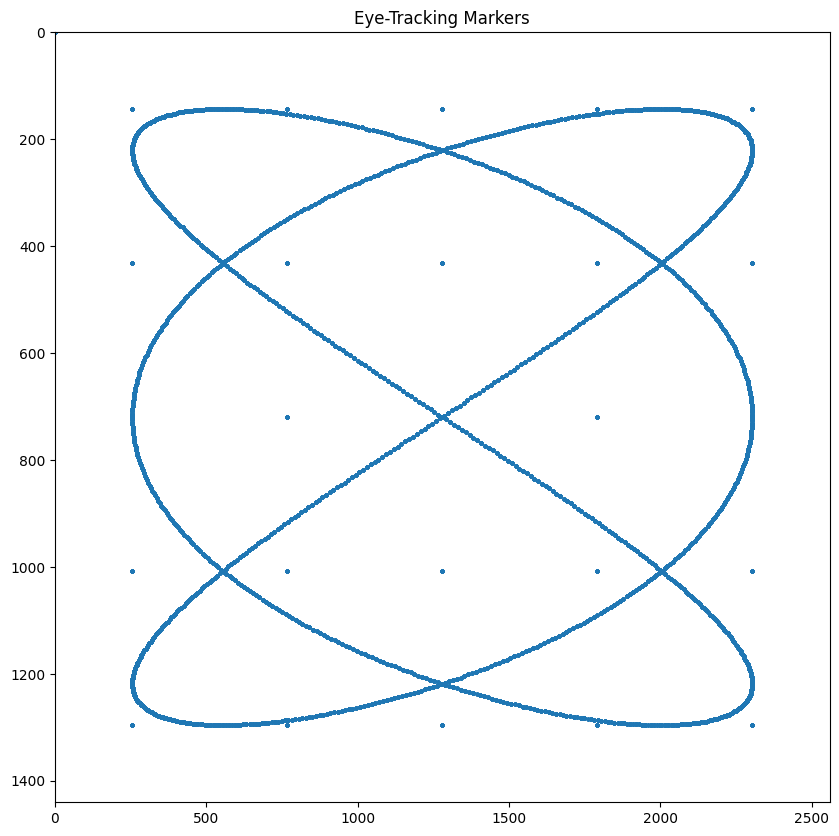

In [3]:
# Extract the x and y markers and plot them 
import matplotlib.pyplot as plt

with h5py.File(file_path, 'r') as f:

    group = f['data']
    x_markers = group['marker_x'][:]
    y_markers = group['marker_y'][:]

    plt.figure(figsize=(10, 10))
    plt.scatter(x_markers, y_markers, s=4)
    plt.xlim(0, 2560)
    plt.ylim(0, 1440)
    plt.gca().invert_yaxis()  # y-axis to match screen coordinates
    plt.title('Eye-Tracking Markers')

### Patients' data

In [4]:
# List unique patints IDs

with h5py.File(file_path, 'r') as f:

    group = f['data']
    patient_ids = group['person_id'][:]
    unique_patient_ids = set(patient_ids)

    for patient in unique_patient_ids:
        print(f"Unique patient ID: {patient}")

Unique patient ID: b'2025_05_24_13_01_11'
Unique patient ID: b'2025_06_02_14_51_21'
Unique patient ID: b'2025_06_04_13_37_22'
Unique patient ID: b'2025_06_07_22_33_55'
Unique patient ID: b'2025_05_27_12_49_26'
Unique patient ID: b'2025_06_07_23_06_07'
Unique patient ID: b'2025_06_07_23_41_49'
Unique patient ID: b'2025_05_27_10_57_49'
Unique patient ID: b'2025_06_02_11_40_38'
Unique patient ID: b'2025_06_02_10_10_49'
Unique patient ID: b'2025_06_08_21_30_13'
Unique patient ID: b'2025_05_27_17_20_19'
Unique patient ID: b'2025_05_27_10_34_49'
Unique patient ID: b'2025_06_02_11_09_16'
Unique patient ID: b'2025_05_29_12_45_05'


### Source.csv content


In [5]:
with h5py.File(file_path, 'r') as f:

    group = f['data']
    csv = group['source_csv'][:]
    unique_csv = set(csv)

    for x in unique_csv:
        print(f"Unique CSV entry: {x}")
    
    # get 3x3 and 5x5 data
    csv_3x3 = [x for x in csv if b'3x3' in x]
    csv_5x5 = [x for x in csv if b'5x5' in x]

with h5py.File(file_path, 'r') as f:
    src = np.array([x.decode('utf-8') for x in f['data']['source_csv'][:]])

    mask_3x3 = src == 'data_3x3.csv'
    mask_5x5 = src == 'data_5x5.csv'
    mask_smooth = src == 'data_smooth.csv'

    print("3x3 samples:", np.sum(mask_3x3))
    print("5x5 samples:", np.sum(mask_5x5))
    print("Smooth samples:", np.sum(mask_smooth))

Unique CSV entry: b'data_video1.csv'
Unique CSV entry: b'data_3x3.csv'
Unique CSV entry: b'data_video2.csv'
Unique CSV entry: b'data_smooth.csv'
Unique CSV entry: b'data_5x5.csv'
3x3 samples: 13495
5x5 samples: 18750
Smooth samples: 13989


The masks above can be used to extract data regarding specific experiment

### Exploring "Grand Truth" data from Tobii eye tracker

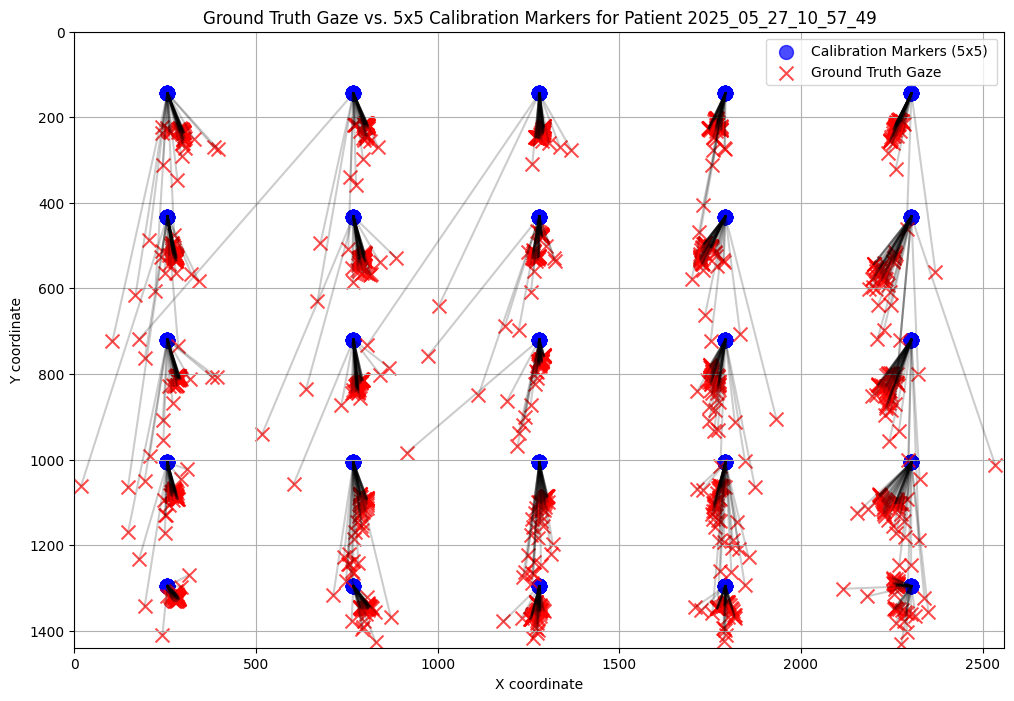

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

file_path = '../data/HybridGaze.h5'

with h5py.File(file_path, 'r') as f:
    group = f['data']
    
    # Define the patient ID to filter by (e.g., p00)
    patient_id_to_filter = b'2025_05_27_10_57_49'

    # Create a mask for the patient
    patient_ids = group['person_id'][:]
    mask_patient = (patient_ids == patient_id_to_filter)

    # Create a mask for the 5x5 grid data
    source_csv = np.array([x.decode('utf-8') for x in group['source_csv'][:]])
    mask_5x5 = source_csv == 'data_5x5.csv'
    
    # Combine the masks to filter by both patient and 5x5 grid
    combined_mask = mask_5x5 & mask_patient

    # Apply the combined mask to get the relevant data
    marker_x_filtered = group['marker_x'][combined_mask]
    marker_y_filtered = group['marker_y'][combined_mask]
    gaze_x_filtered = group['gaze_x'][combined_mask]
    gaze_y_filtered = group['gaze_y'][combined_mask]

# Filter out gaze points that are outside the screen resolution
screen_width = 2560
screen_height = 1440
valid_gaze_mask = (gaze_x_filtered >= 0) & (gaze_x_filtered <= screen_width) & \
                  (gaze_y_filtered >= 0) & (gaze_y_filtered <= screen_height)

marker_x_final = marker_x_filtered[valid_gaze_mask]
marker_y_final = marker_y_filtered[valid_gaze_mask]
gaze_x_final = gaze_x_filtered[valid_gaze_mask]
gaze_y_final = gaze_y_filtered[valid_gaze_mask]


# Create the plot
plt.figure(figsize=(12, 8))

# Plot the calibration markers
plt.scatter(marker_x_final, marker_y_final, s=100, label=f'Calibration Markers (5x5) ', c='blue', marker='o', alpha=0.7)

# Plot the "ground truth" gaze points from the eye tracker
plt.scatter(gaze_x_final, gaze_y_final, s=100, label=f'Ground Truth Gaze ', c='red', marker='x', alpha=0.7)

# Draw lines connecting calibration points to their corresponding gaze points
for i in range(len(marker_x_final)):
    plt.plot([marker_x_final[i], gaze_x_final[i]], [marker_y_final[i], gaze_y_final[i]], 'k-', alpha=0.2)

# Set plot properties
plt.title(f'Ground Truth Gaze vs. 5x5 Calibration Markers for Patient {patient_id_to_filter.decode()}')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.grid(True)
plt.xlim(0, 2560)
plt.ylim(0, 1440)
plt.gca().invert_yaxis()  # Invert y-axis to match screen coordinates
plt.show()


# Exploring the corelation between landmarks and target point

This approach aims to check whether a reduction of input vectors based on the landmarks corelation with the target  may be justified. The goal will be to find high-impact landmarks common for all the participants  

### Data preparation for corelation analysis

In [7]:
import pandas as pd

with h5py.File(file_path, 'r') as f:
    data_group = f['data']
    
    # Extract all necessary data
    all_landmarks = data_group['landmarks'][:]
    all_marker_x = data_group['marker_x'][:]
    all_marker_y = data_group['marker_y'][:]
    all_person_ids = np.array([pid.decode('utf-8') for pid in data_group['person_id'][:]])
    all_is_valid = data_group['is_valid'][:]

# Use only valid samples
valid_indices = np.where(all_is_valid)[0]
landmarks = all_landmarks[valid_indices]
y = np.stack((all_marker_x[valid_indices], all_marker_y[valid_indices]), axis=-1)
person_ids_valid = all_person_ids[valid_indices]

# Reshape landmarks
landmarks_xy = landmarks[:, :, :2]
num_samples = landmarks_xy.shape[0]
num_landmarks = landmarks_xy.shape[1]

# Create a DataFrame for easier manipulation
landmark_features = landmarks_xy.reshape(num_samples, -1)
columns = [f'landmark_{i}_{axis}' for i in range(num_landmarks) for axis in ['x', 'y']]
df_landmarks = pd.DataFrame(landmark_features, columns=columns)

df_targets = pd.DataFrame(y, columns=['target_x', 'target_y'])
df_person = pd.DataFrame(person_ids_valid, columns=['person_id'])

# Combine into a single DataFrame
df_full = pd.concat([df_person, df_landmarks, df_targets], axis=1)

print("Full DataFrame shape:", df_full.shape)
df_full.head()

Full DataFrame shape: (139122, 959)


,person_id,landmark_0_x,landmark_0_y,landmark_1_x,landmark_1_y,landmark_2_x,landmark_2_y,landmark_3_x,landmark_3_y,landmark_4_x,...,landmark_474_x,landmark_474_y,landmark_475_x,landmark_475_y,landmark_476_x,landmark_476_y,landmark_477_x,landmark_477_y,target_x,target_y
0,2025_05_24_13_01_11,0.508297,0.566979,0.505861,0.526406,0.506080,0.537306,0.500166,0.483729,0.505767,...,0.551020,0.449573,0.544216,0.439305,0.537002,0.448655,0.543794,0.458982,256.0,144.0
1,2025_05_24_13_01_11,0.508703,0.567179,0.506035,0.528363,0.506317,0.539596,0.500327,0.485254,0.505929,...,0.550688,0.449225,0.543483,0.438380,0.535995,0.448541,0.543197,0.459445,256.0,144.0
2,2025_05_24_13_01_11,0.508715,0.566764,0.506364,0.528953,0.506503,0.540296,0.500611,0.485524,0.506282,...,0.551145,0.449270,0.544227,0.438452,0.537177,0.448595,0.544082,0.459466,256.0,144.0
3,2025_05_24_13_01_11,0.508507,0.567933,0.505853,0.528315,0.506233,0.539602,0.500257,0.485191,0.505734,...,0.550741,0.449367,0.543867,0.438720,0.536834,0.448646,0.543692,0.459361,256.0,144.0
4,2025_05_24_13_01_11,0.507707,0.566662,0.505564,0.528542,0.505932,0.539927,0.499887,0.485388,0.505439,...,0.550543,0.448471,0.543548,0.437956,0.536406,0.448134,0.543394,0.458721,256.0,144.0


### Calculating and visualizing correlations for each person

In [ ]:
import seaborn as sns

# Get unique person IDs
unique_persons = df_full['person_id'].unique()

# Store correlations for each person
person_correlations = {}

for person in unique_persons:
    df_person = df_full[df_full['person_id'] == person]
    
    # Calculate correlation matrix for this person
    corr_matrix = df_person.corr(numeric_only=True)
    
    # Get correlations of landmarks with target_x and target_y
    corr_with_targets = corr_matrix[['target_x', 'target_y']].drop(['target_x', 'target_y'])
    
    person_correlations[person] = corr_with_targets

# Let's inspect the correlations for the first person as an example
first_person_id = unique_persons[0]
print(f"Correlations for person: {first_person_id}")
print(person_correlations[first_person_id].head())

# Find the top 50 landmarks with the highest correlation for each person
top_n = 100
top_corr_landmarks_per_person = {}

for person, corr_df in person_correlations.items():
    # Calculate the maximum absolute correlation for each landmark with either target_x or target_y
    max_abs_corr = corr_df[['target_x', 'target_y']].abs().max(axis=1)
    
    # Get the top N landmarks
    top_landmarks = max_abs_corr.nlargest(top_n)
    
    top_corr_landmarks_per_person[person] = top_landmarks.index.tolist()
    print(f"\nPerson {person} has {len(top_landmarks.index)} landmarks in their top {top_n}.")

# Find the intersection of top-correlation landmarks across all persons
if top_corr_landmarks_per_person:
    # Initialize with the set from the first person
    common_landmarks = set(list(top_corr_landmarks_per_person.values())[0])
    
    # Intersect with the sets from all other persons
    for person, landmarks in top_corr_landmarks_per_person.items():
        common_landmarks.intersection_update(landmarks)

    print(f"\nFound {len(common_landmarks)} common landmarks in the top {top_n} across all participants:")
    
    # Extract just the landmark index number for a cleaner list
    # The result will contain both x and y coordinates, so we use a set to get unique indices
    common_indices = sorted(list(set([int(lm.split('_')[1]) for lm in common_landmarks])))
    print(common_indices)
else:
    print("Could not determine top correlated landmarks.")

Correlations for person: 2025_05_24_13_01_11
              target_x  target_y
landmark_0_x  0.189277  0.233703
landmark_0_y  0.114918  0.233228
landmark_1_x  0.185331  0.247516
landmark_1_y  0.103599  0.228221
landmark_2_x  0.190362  0.247989

Person 2025_05_24_13_01_11 has 50 landmarks in their top 50.

Person 2025_05_27_10_34_49 has 50 landmarks in their top 50.

Person 2025_05_27_10_57_49 has 50 landmarks in their top 50.

Person 2025_05_27_12_49_26 has 50 landmarks in their top 50.

Person 2025_05_27_17_20_19 has 50 landmarks in their top 50.

Person 2025_05_29_12_45_05 has 50 landmarks in their top 50.

Person 2025_06_02_10_10_49 has 50 landmarks in their top 50.

Person 2025_06_02_11_09_16 has 50 landmarks in their top 50.

Person 2025_06_02_11_40_38 has 50 landmarks in their top 50.

Person 2025_06_02_14_51_21 has 50 landmarks in their top 50.

Person 2025_06_04_13_37_22 has 50 landmarks in their top 50.

Person 2025_06_07_22_33_55 has 50 landmarks in their top 50.

Person 2025_